Se carga el catálogo de las subenanas

Se analizan los datos del fichero del catálog

Se prepara el dataset con las plantillas

Se preparan los ficheros para descargar los espectros de SDSS

Se prepara el dataset con los espectros de las subenanas

# Librerias

In [ ]:
 from astropy.io import fits

In [ ]:
%matplotlib inline


In [ ]:
import json

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [ ]:
import numpy as np
import pandas as pd
import io

from astropy.io import ascii
import os
import sys


In [ ]:
!pip install pyprind

# Montar google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Astrofisica/Espectros")
#/content/drive/My Drive/Visualizacion
os.getcwd()

'/content/drive/MyDrive/Astrofisica/Espectros'

#Carga fichero fit con el catálogo de EM de baja metalicidad. (Savcheva et al. 2014)

Cargamos el fichero fit donde se encuentran las información de las enanas marrones usadas para crear las plantillas (Savcheva et al 2014)

In [ ]:
fichero = 'datafile1.fits'

In [ ]:
 hdul = fits.open(fichero)

In [ ]:
hdul.info()

Filename: datafile1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    121   3517R x 52C   [21A, I, J, I, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, I, E, E, E, E, I, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E]   


Analizamos el contenido

In [ ]:
hdul[0].header

SIMPLE  =                    T /Dummy Created by MWRFITS v1.11b                 
BITPIX  =                    8 /Dummy primary header created by MWRFITS         
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               

Los metadatos se encuentran en la cabecera

In [ ]:
metadatos = hdul[1].header

In [ ]:
datos = hdul[1].data

In [ ]:
hdul.close()

In [ ]:
metadatos

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11b          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  221 /Number of bytes per row                         
NAXIS2  =                 3517 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   52 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [ ]:
datos.shape

(3517,)

Observamos el contenido de los datos. Vemos que cada fila es una n-tupla con la información de una subenana

In [ ]:
datos[1:5]

FITS_rec([('SDSS125438.5-012710.8', 337, 51997, 601, 193.66026388, -1.45299677, 23.698956, 17.714697, 18.538862, 21.839705, 19.92816 , 0.84661 , 0.023911, 0.016288, 0.070512, 0.022039, 0.109857, 0.031519, 0.044454, 0.080831, 0.058626,  2.61205e+01,   -19.3635,  5.44588e+00,  5.44588e+00, 0.27315512, 0.41798893, 0.47744307,     1,  2.29477e+01,     5,   184.793,   181.361 ,   63.9773 , 0.60423577, 6, 13.064486, 11.456273, 10.792685,   229.61993,   216.50806,    62.306774,   -12.891923,    52.988358,    73.14216 , -9999,  0.713584 , 0.37238 , 10.3905 ,    42.36171 ,    35.44969 ,    10.643162),
          ('SDSS130232.5-032127.0', 339, 51692, 215, 195.63534102, -3.35749998, 23.151434, 19.139017, 19.822762, 21.358227, 20.659847, 0.599416, 0.066416, 0.047198, 0.060566, 0.052701, 0.144863, 0.041562, 0.058619, 0.106589, 0.077307, -9.99900e+03, -9999.    , -9.99900e+03, -9.99900e+03, 0.5418207 , 0.6504045 , 0.7998724 , -9999, -9.99900e+03, -9999, -9999.   , -9999.    , -165.471  , 0.37605283, 

Creamos un dataframe para guardar el contenido del fichero.

In [ ]:
df_catalogo_BD = pd.DataFrame(columns=datos.dtype.names)
df_catalogo_BD

,ID,PLATE,MJD,FIBER,RA,DEC,U,Z,I,G,R,ERR_U,ERR_Z,ERR_I,ERR_G,ERR_R,EXTINCTION_U,EXTINCTION_Z,EXTINCTION_I,EXTINCTION_G,EXTINCTION_R,PMRA,PMDEC,PMRAERR,PMDECERR,CAH2,CAH3,TIO5,MATCH,DIST22,NFIT,SIGRA,SIGDEC,RV,ZETA,SP,MR,MI,MZ,D,ZGAL,UGAL,VGAL,WGAL,VTOTG,ACTIVITY,EWHA,EWHAERR,SNR,D_ERR,VTR,VTR_ERR


In [ ]:
for i in datos:
  data_temp = np.asarray(list(i))
  df_temp = pd.DataFrame(data=data_temp.reshape(1,-1), columns=datos.dtype.names)
  df_catalogo_BD =pd.concat([df_catalogo_BD, df_temp], ignore_index=True)

In [ ]:
df_catalogo_BD

,ID,PLATE,MJD,FIBER,RA,DEC,U,Z,I,G,R,ERR_U,ERR_Z,ERR_I,ERR_G,ERR_R,EXTINCTION_U,EXTINCTION_Z,EXTINCTION_I,EXTINCTION_G,EXTINCTION_R,PMRA,PMDEC,PMRAERR,PMDECERR,CAH2,CAH3,TIO5,MATCH,DIST22,NFIT,SIGRA,SIGDEC,RV,ZETA,SP,MR,MI,MZ,D,ZGAL,UGAL,VGAL,WGAL,VTOTG,ACTIVITY,EWHA,EWHAERR,SNR,D_ERR,VTR,VTR_ERR
0,SDSS124626.9-023810.8,337,51997,312,191.61192296,-2.63632353,23.469448,17.949856,19.768297,24.52475,22.401068,1.265012,0.026658,0.029573,0.561597,0.164698,0.130588,0.037467,0.052843,0.096086,0.069689,-9999.0,-9999.0,-9999.0,-9999.0,0.3894108,0.60908264,0.56521904,-9999,-9999.0,-9999,-9999.0,-9999.0,-618.839,0.6498557,4,22.406868,18.854904,5.1389847,9.658334,23.377802,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-0.231155,1.67826,2.06356,1.924041,-9999.0,-9999.0
1,SDSS125438.5-012710.8,337,51997,601,193.66026388,-1.45299677,23.698956,17.714697,18.538862,21.839705,19.92816,0.84661,0.023911,0.016288,0.070512,0.022039,0.109857,0.031519,0.044454,0.080831,0.058626,26.1205,-19.3635,5.44588,5.44588,0.27315512,0.41798893,0.47744307,1,22.9477,5,184.793,181.361,63.9773,0.60423577,6,13.064486,11.456273,10.792685,229.61993,216.50806,62.306774,-12.891923,52.988358,73.14216,-9999,0.713584,0.37238,10.3905,42.36171,35.44969,10.643162
2,SDSS130232.5-032127.0,339,51692,215,195.63534102,-3.35749998,23.151434,19.139017,19.822762,21.358227,20.659847,0.599416,0.066416,0.047198,0.060566,0.052701,0.144863,0.041562,0.058619,0.106589,0.077307,-9999.0,-9999.0,-9999.0,-9999.0,0.5418207,0.6504045,0.7998724,-9999,-9999.0,-9999,-9999.0,-9999.0,-165.471,0.37605283,2,5.869413,5.215624,4.554844,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,-1.67594,0.80401,4.4428,-9999.0,-9999.0,-9999.0
3,SDSS130813.4-030416.2,339,51692,64,197.05595188,-3.07117973,22.414455,18.023851,18.61743,21.328026,19.531221,0.375616,0.036989,0.025271,0.049805,0.030477,0.117518,0.033717,0.047554,0.086469,0.062714,1.62411,-59.1755,4.88931,4.88931,0.4068228,0.5822758,0.7437269,1,6.59505,5,144.579,563.777,107.297,0.3793661,4,12.039273,10.996625,10.60371,306.0885,278.63602,88.944885,-89.81706,56.395985,137.53015,0,0.318085,0.297471,7.51684,56.54701,86.03427,18.804398
4,SDSS125541.7-023845.7,338,51694,271,193.92382554,-2.64603735,22.911034,16.968216,17.678118,20.654444,18.975643,0.39813,0.020143,0.01766,0.047947,0.020367,0.111673,0.03204,0.045189,0.082168,0.059595,31.74,11.127,4.61339,4.61339,0.40302444,0.6597468,0.49682838,1,27.4143,5,284.206,40.0214,8.01442,0.80615884,3,11.951363,10.578309,10.018705,247.13667,229.3491,38.27942,38.960026,20.063726,40.272427,0,0.0140708,0.156885,12.1959,45.583233,39.466915,10.564208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,SDSS230811.0+224806.0,2629,54087,479,347.0458277,22.80166326,23.827799,17.589266,18.242699,21.434738,19.46614,0.714571,0.020899,0.018651,0.037778,0.01937,1.329774,0.38152,0.5381,0.978435,0.709643,9.7532,1.31321,4.34709,4.34709,0.618691,0.8234276,0.7409409,1,12.9125,4,182.196,224.171,-16.9271,0.7250273,1,11.753748,10.691244,10.257639,251.50703,-126.28557,1.2272384,-4.757723,13.39841,20.606794,0,-0.109063,0.100911,12.4248,46.383595,11.75216,7.65471
3513,SDSS233929.1+093423.1,2628,54326,574,354.87120409,9.5730817,23.493614,17.942179,18.385588,20.71757,19.097324,0.580265,0.024896,0.013841,0.02876,0.014029,0.585232,0.167907,0.236818,0.430608,0.312313,139.187,-16.8852,4.02186,4.02186,0.75207025,0.8922586,1.0310229,1,18.9509,5,347.79,193.335,-167.612,-0.13514939,0,10.644874,9.875451,9.609516,424.6464,-307.20575,-208.05579,-230.28288,37.367928,328.64877,0,0.188474,0.112979,19.9166,78.27086,282.6946,53.353367
3514,SDSS044528.0+111809.8,2669,54086,514,71.3666912,11.30271682,23.372631,15.850621,16.458761,19.23311,17.53602,1.162422,0.016042,0.009875375,0.02527,0.015799,3.142726,0.901667,1.271722,2.312388,1.677137,9.60701,-29.7091,2.70671,2.70671,0.7743355,0.8899199,0.8684572,1,0.756302,6,159

In [ ]:
df_catalogo_BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            3517 non-null   object
 1   PLATE         3517 non-null   object
 2   MJD           3517 non-null   object
 3   FIBER         3517 non-null   object
 4   RA            3517 non-null   object
 5   DEC           3517 non-null   object
 6   U             3517 non-null   object
 7   Z             3517 non-null   object
 8   I             3517 non-null   object
 9   G             3517 non-null   object
 10  R             3517 non-null   object
 11  ERR_U         3517 non-null   object
 12  ERR_Z         3517 non-null   object
 13  ERR_I         3517 non-null   object
 14  ERR_G         3517 non-null   object
 15  ERR_R         3517 non-null   object
 16  EXTINCTION_U  3517 non-null   object
 17  EXTINCTION_Z  3517 non-null   object
 18  EXTINCTION_I  3517 non-null   object
 19  EXTINC

Tenemos información de CAH2	CAH3	TIO5

Convertimos a númerico los campos salvo el ID

In [ ]:
columnas = df_catalogo_BD.columns

In [ ]:
df_catalogo_BD[columnas[1:]] = df_catalogo_BD[columnas[1:]].apply(pd.to_numeric, errors='coerce', axis=1)


In [ ]:
df_catalogo_BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3517 non-null   object 
 1   PLATE         3517 non-null   float64
 2   MJD           3517 non-null   float64
 3   FIBER         3517 non-null   float64
 4   RA            3517 non-null   float64
 5   DEC           3517 non-null   float64
 6   U             3517 non-null   float64
 7   Z             3517 non-null   float64
 8   I             3517 non-null   float64
 9   G             3517 non-null   float64
 10  R             3517 non-null   float64
 11  ERR_U         3517 non-null   float64
 12  ERR_Z         3517 non-null   float64
 13  ERR_I         3517 non-null   float64
 14  ERR_G         3517 non-null   float64
 15  ERR_R         3517 non-null   float64
 16  EXTINCTION_U  3517 non-null   float64
 17  EXTINCTION_Z  3517 non-null   float64
 18  EXTINCTION_I  3517 non-null 

## Guardado dataset Savcheva.

Guardamos la información del dataset con índices de las bandas.

In [ ]:
directorio_1 = '../Espectros/'
df_catalogo_BD.to_csv(directorio_1+'datos_info_fotometrica_abs_molecular.csv', index=False, encoding='utf-8')

# Creación de los ficheros para cargar la información de SDSS. 



En esta sección crearemos los ficheros que subiremos a 
https://dr16.sdss.org/optical/spectrum/search para descargar los enlaces de los espectros. El tamaños máximo es de 1000, luego crearemos 4 ficheros. Una vez obtenidos los enlaces los descargaremos usando el comando **wget**. https://www.sdss.org/dr12/data_access/bulk/. La descaga se ha hecho del release 16.

Aparte de los fichero con los enclaces  también descargaremos en formato csv la información relativa a la clase. 

Los ficheros que subiremos a SDSS contendrán la siguiente información'PLATE', 'MJD', 'FIBER' separado por comas.

In [ ]:
plate_mjd_fiber = df_catalogo_BD[['PLATE', 'MJD', 'FIBER']].values

In [ ]:
n_particiones = 4
tamano = int(plate_mjd_fiber.shape[0]/n_particiones)
fichero = "BD_plate_mjd_fiber_"
i=1
for k in np.arange(0,tamano*(n_particiones-1),tamano):
  nom_fichero = fichero+str(i)+'.txt'
  inicio, final = k , k+tamano
  np.savetxt(nom_fichero, plate_mjd_fiber[inicio:final], fmt='%i', delimiter=',')
  print(f"iteracion {i} {nom_fichero} numero de registro inicial {inicio} numero de registro final {final-1} ")
  i+=1
inicio, final = final, plate_mjd_fiber.shape[0]
nom_fichero = fichero+str(i)+'.csv'
np.savetxt(nom_fichero, plate_mjd_fiber[inicio:final], fmt='%i', delimiter=',')
print(f"iteracion {i} {nom_fichero} numero de registro inicial {inicio} numero de registro final {final-1} ")


iteracion 1 testBD_plate_mjd_fiber_1.txt numero de registro inicial 0 numero de registro final 878 
iteracion 2 testBD_plate_mjd_fiber_2.txt numero de registro inicial 879 numero de registro final 1757 
iteracion 3 testBD_plate_mjd_fiber_3.txt numero de registro inicial 1758 numero de registro final 2636 
iteracion 4 testBD_plate_mjd_fiber_4.csv numero de registro inicial 2637 numero de registro final 3516 


In [ ]:
np.savetxt('BD_plate_mjd_fiber.txt', plate_mjd_fiber, fmt='%i', delimiter=',')


# Revisión de los datos contenidos en los ficheros

Un ejemplo de un fichero descagado es *spec-0268-51633-0613.fits*. Vemos que el formato es spec-plate-MJD-fiber.fits. plate está formado por cuatro dígitos indicando la placa, MJD consta de 5 dígitos y fiber de 4. 

## Revisión a la estructura del archivo fits con los espectros. 

Abrimos un fichero cualquiera con la información espectroscópica.

In [ ]:
fichero = '../Espectros/BD_espectros_sample/spec-0268-51633-0613.fits'


In [ ]:
 hdul = fits.open(fichero)

In [ ]:
hdul.info()


Filename: ../Espectros/BD_espectros_sample/spec-0268-51633-0613.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3823R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


Vemos que tenemos 4 HDU o Header Data Unit.

Podemos revisar los metadatos. El espectro parece estar en COADD

http://classic.sdss.org/dr7/products/spectra/read_spSpec.html

http://classic.sdss.org/dr7/dm/flatFiles/spSpec.html

In [ ]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4461103622.69 / 1st row - Number of seconds since Nov 17 1858  
RA      =            149.06058 / 1st row - Right ascension of telescope boresigh
DEC     =            0.079430  / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '03:00:42.00'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                51633 / MJD of observation                             
MJDLIST = '51633   '        

En principio no parece que nos interese esta información. Es información de la placa. 

In [ ]:
metadatos = hdul[1].header
metadatos

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3823 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

Vemos que tenemos el logaritmo de la frecuencia y que viene en Armstrong. TTYPE2  = 'loglam'

In [ ]:
data=hdul[1].data #datos con espectro proveniente de SDSS

Aqui tenemos los espectros.

En SPECOBJ tenemos

In [ ]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1068 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  126 / number of table fields                         
TTYPE1  = 'SURVEY  '                                                            
TFORM1  = '6A      '                                                            
TTYPE2  = 'INSTRUMENT'                                                          
TFORM2  = '4A      '                                                            
TTYPE3  = 'CHUNK   '        

In [ ]:
info = hdul[2].data
info

FITS_rec([('sdss', 'SDSS', 'chunk4', 'legacy', 'chunk4', 'good', 17.866, 0., 5000., -1, 0., -9999., -1, 1, 1, 0, 0, 0, 0, 0, '    301909702588000256', '1237651752386560073', '1237651752386560073', '       284708016160795', '301741202431043584', 1, 'dr7', '26', '', -1, -0.86615513, 0.49951471, 0.01613506, 210.4651, 184.10065, 'GALAXY', 'SCIENCE', 32, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 268, 120, 51633, 613, [752,   1,   6,  43,  27], 150.0278, 0.9245107, 'STAR', 'M0', 1.7439676e-05, 2.5886555e-05, 1.1969466, 3705, 0.26889992, 'spEigenStar-54474.fits', [26, -1, -1, -1, -1, -1, -1, -1, -1, -1], 4, [ 3.8803754, -0.0316433,  2.4883125, -3.5610878,  1.3920816,  0.       ,  0.       ,  0.       ,  0.       ,  0.       ], 0., 0., 0., 0., 0., 0., 0, 3816.8052, 9202.377, 0.371, 0, 5.9078245, [ 0.73548955,  2.2429743 ,  8.360105  , 12.024783  ,  7.44706   ], 1.0631895, [0.3490566 , 0.06873316, 0.00619946, 0.00080863, 0.        , 0.        , 0.        , 0.        , 0.        , 0.     

Para ver los datos con más claridad creamos un DataFrame

In [ ]:
df_info =pd.DataFrame(columns=info.dtype.names)

In [ ]:
for i in info:
  data_temp = np.asarray(list(i))
  df_temp = pd.DataFrame(data=data_temp.reshape(1,-1), columns=info.dtype.names)
  df_info =pd.concat([df_info, df_temp], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
pd.set_option('display.max_columns', 200)

In [ ]:
df_info

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,PLATESN2,DEREDSN2,LAMBDA_EFF,BLUEFIBER,ZOFFSET,SNTURNOFF,NTURNOFF,SPECPRIMARY,SPECLEGACY,SPECSEGUE,SPECSEGUE1,SPECSEGUE2,SPECBOSS,BOSS_SPECOBJ_ID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,PLATEID,NSPECOBS,FIRSTRELEASE,RUN2D,RUN1D,DESIGNID,CX,CY,CZ,XFOCAL,YFOCAL,SOURCETYPE,TARGETTYPE,PRIMTARGET,SECTARGET,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,SEGUE1_TARGET1,SEGUE1_TARGET2,SEGUE2_TARGET1,SEGUE2_TARGET2,MARVELS_TARGET1,MARVELS_TARGET2,BOSS_TARGET1,BOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,SPECTROGRAPHID,PLATE,TILE,MJD,FIBERID,OBJID,PLUG_RA,PLUG_DEC,CLASS,SUBCLASS,Z,Z_ERR,RCHI2,DOF,RCHI2DIFF,TFILE,TCOLUMN,NPOLY,THETA,VDISP,VDISP_ERR,VDISPZ,VDISPZ_ERR,VDISPCHI2,VDISPNPIX,VDISPDOF,WAVEMIN,WAVEMAX,WCOVERAGE,ZWARNING,SN_MEDIAN_ALL,SN_MEDIAN,CHI68P,FRACNSIGMA,FRACNSIGHI,FRACNSIGLO,SPECTROFLUX,SPECTROFLUX_IVAR,SPECTROSYNFLUX,SPECTROSYNFLUX_IVAR,SPECTROSKYFLUX,ANYANDMASK,ANYORMASK,SPEC1_G,SPEC1_R,SPEC1_I,SPEC2_G,SPEC2_R,SPEC2_I,ELODIE_FILENAME,ELODIE_OBJECT,ELODIE_SPTYPE,ELODIE_BV,ELODIE_TEFF,ELODIE_LOGG,ELODIE_FEH,ELODIE_Z,ELODIE_Z_ERR,ELODIE_Z_MODELERR,ELODIE_RCHI2,ELODIE_DOF,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,COMMENTS_PERSON,CALIBFLUX,CALIBFLUX_IVAR
0,sdss,SDSS,chunk4,legacy,chunk4,good,17.866,0,5000,-1,0,-9999,-1,1,1,0,0,0,0,0,301909702588000256,1237651752386560073,1237651752386560073,284708016160795,301741202431043584,1,dr7,26,,-1,-0.866155,0.499515,0.0161351,210.465,184.101,GALAXY,SCIENCE,32,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,2,268,120,51633,613,"[752, 1, 6, 43, 27]",150.028,0.924511,STAR,M0,1.74397e-05,2.58866e-05,1.19695,3705,0.2689,spEigenStar-54474.fits,"[26, -1, -1, -1, -1, -1, -1, -1, -1, -1]",4,"[3.8803754, -0.031643305, 2.4883125, -3.561087...",0,0,0,0,0,0,0,3816.81,9202.38,0.371,0,5.90782,"[0.73548955, 2.2429743, 8.360105, 12.024783, 7...",1.06319,"[0.3490566, 0.068733156, 0.006199461, 0.000808...","[0.18625337, 0.035309974, 0.0026954177, 0.0005...","[0.16280323, 0.03342318, 0.0035040432, 0.00026...","[2.8725452, 4.5272255, 18.289047, 33.618126, 4...","[1.1579553, 2.88411, 2.4778805, 1.1254339, 0.5...","[0.52303994, 4.7097363, 17.5966, 33.989655, 47...","[1.8444453, 3.0027, 2.6788292, 1.3969055, 0.57...","[10.252554, 16.644323, 32.541145, 63.768898, 1...",25165824,262078464,23.766,20.364,17.866,21.6428,22.6513,18.7807,RAC/L/00372.fits,HD079210,M0V,1.41,3858,4.165,-0.06,-8.45129e-06,3.21801e-05,3.15453e-05,1.06445,2137,0,0,0,,,0,0,0,0,,"[0.5450224, 4.842859, 18.666767, 34.3554, 45.5...","[10.769541, 16.401342, 5.5613813, 2.462531, 0...."


Vemos que tenemos Z, la clase y la subclase. 

In [ ]:
df_info[['CLASS','SUBCLASS','Z', 'Z_ERR']]

,CLASS,SUBCLASS,Z
0,STAR,M0,1.74397e-05


In [ ]:
# Este campo nos da información de los flujos calibrados para cada banda
len(df_info['CALIBFLUX'][0])

5

In [ ]:
# Este campo nos da información de los flujos calibrados para cada banda
len(df_info['SPECTROFLUX'][0])

5

Contiene información para la reducción del espectro. Contains the entries from the plPlugMapM file used for the Spectro-2D reduction. 

http://classic.sdss.org/dr6/dm/flatFiles/spPlate.html

De aquí nos puede interesar la calidad de la placa **PLATEQUALITY** si queremos descartar placar con mala calidad. También nos interesa **PLATE, MJD, FIBER, CLASS,	SUBCLASS y	Z** y de momento **SPECOBJID**

In [ ]:
hdul[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   89 / length of dimension 1                          
NAXIS2  =                   29 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   19 / number of table fields                         
TTYPE1  = 'PLATE   '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'MJD     '                                                            
TFORM2  = 'J       '                                                            
TTYPE3  = 'FIBERID '        

In [ ]:
info = hdul[3].data
info

FITS_rec([(268, 51633, 613, 'Ly_alpha', 1215.67      , 0.        , -1.0000000e+00,  0.      , -1.      ,  0.        , -1.       ,   0.        , -1.        ,  0.        , -1.        , 0, 0, 0.        , -1.0000000e+00),
          (268, 51633, 613, 'N_V 1240', 1240.81      , 0.        , -1.0000000e+00,  0.      , -1.      ,  0.        , -1.       ,   0.        , -1.        ,  0.        , -1.        , 0, 0, 0.        , -1.0000000e+00),
          (268, 51633, 613, 'C_IV 1549', 1549.48      , 0.        , -1.0000000e+00,  0.      , -1.      ,  0.        , -1.       ,   0.        , -1.        ,  0.        , -1.        , 0, 0, 0.        , -1.0000000e+00),
          (268, 51633, 613, 'He_II 1640', 1640.42      , 0.        , -1.0000000e+00,  0.      , -1.      ,  0.        , -1.       ,   0.        , -1.        ,  0.        , -1.        , 0, 0, 0.        , -1.0000000e+00),
          (268, 51633, 613, 'C_III] 1908', 1908.734     , 0.        , -1.0000000e+00,  0.      , -1.      ,  0.        , -1. 

In [ ]:
df_info =pd.DataFrame(columns=info.dtype.names)

In [ ]:
for i in info:
  data_temp = np.asarray(list(i))
  df_temp = pd.DataFrame(data=data_temp.reshape(1,-1), columns=info.dtype.names)
  df_info =pd.concat([df_info, df_temp], ignore_index=True)

In [ ]:
df_info.head(6)

,PLATE,MJD,FIBERID,LINENAME,LINEWAVE,LINEZ,LINEZ_ERR,LINESIGMA,LINESIGMA_ERR,LINEAREA,LINEAREA_ERR,LINEEW,LINEEW_ERR,LINECONTLEVEL,LINECONTLEVEL_ERR,LINENPIXLEFT,LINENPIXRIGHT,LINEDOF,LINECHI2
0,268,51633,613,Ly_alpha,1215.67,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
1,268,51633,613,N_V 1240,1240.81,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
2,268,51633,613,C_IV 1549,1549.48,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
3,268,51633,613,He_II 1640,1640.42,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
4,268,51633,613,C_III] 1908,1908.734,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0
5,268,51633,613,Mg_II 2799,2800.3151836549728,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0,0,0.0,-1.0


Vemos que tenemos información relativa a distintas líneas. La columna LINENAME es la línea 	LINEWAVE	es la longitud de onda  detectada. De esta manera se pude calcular el redshift. Tampoco lo vamos a usar en principio.

In [ ]:
(2800.3151836549728-2799)/2799

0.0004698762611549734

In [ ]:
(0.81/1240)

0.000653225806451613

In [ ]:
(6732.67807633-6730)/6730

0.0003979311040119308

In [ ]:
hdul.close()

## Vista del espectro

Creamos un dataset con el contenido COADD

In [ ]:
df_espectro =pd.DataFrame(columns=data.dtype.names)

In [ ]:
for i in data:
  data_temp = np.asarray(list(i))
  df_temp = pd.DataFrame(data=data_temp.reshape(1,-1), columns=data.dtype.names)
  df_espectro =pd.concat([df_espectro, df_temp], ignore_index=True)

In [ ]:
df_espectro

,flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
0,3.655200,3.5817,0.118775,0.0,0.0,1.117710,8.829679,0.349158
1,-2.729364,3.5818,0.133674,0.0,0.0,1.117465,8.935184,0.357834
2,2.713475,3.5819,0.125535,0.0,0.0,1.117217,8.976383,0.356467
3,-4.635965,3.5820,0.140654,0.0,1048576.0,1.116970,8.717118,0.327851
4,-1.571478,3.5821,0.137133,0.0,1048576.0,1.116722,8.252521,0.272636
...,...,...,...,...,...,...,...,...
3818,5.529174,3.9635,0.864994,0.0,0.0,0.718863,4.028460,7.036469
3819,6.832325,3.9636,0.800677,0.0,0.0,0.718767,4.149183,7.076458
3820,5.398345,3.9637,0.831826,0.0,0.0,0.718669,4.094193,7.175083
3821,7.610079,3.9638,0.810460,0.0,0.0,0.718570,3.924091,6.879727


In [ ]:
X= 10**df_espectro['loglam']
y= df_espectro['flux']

In [ ]:
x.shape

(3837,)

In [ ]:
X

0       3816.806003
1       3817.684054
2       3818.562307
3       3819.442859
4       3820.321517
           ...     
3818    9193.905233
3819    9196.020278
3820    9198.140860
3821    9200.256881
3822    9202.378439
Name: loglam, Length: 3823, dtype: float64

(-5.0, 10.0)

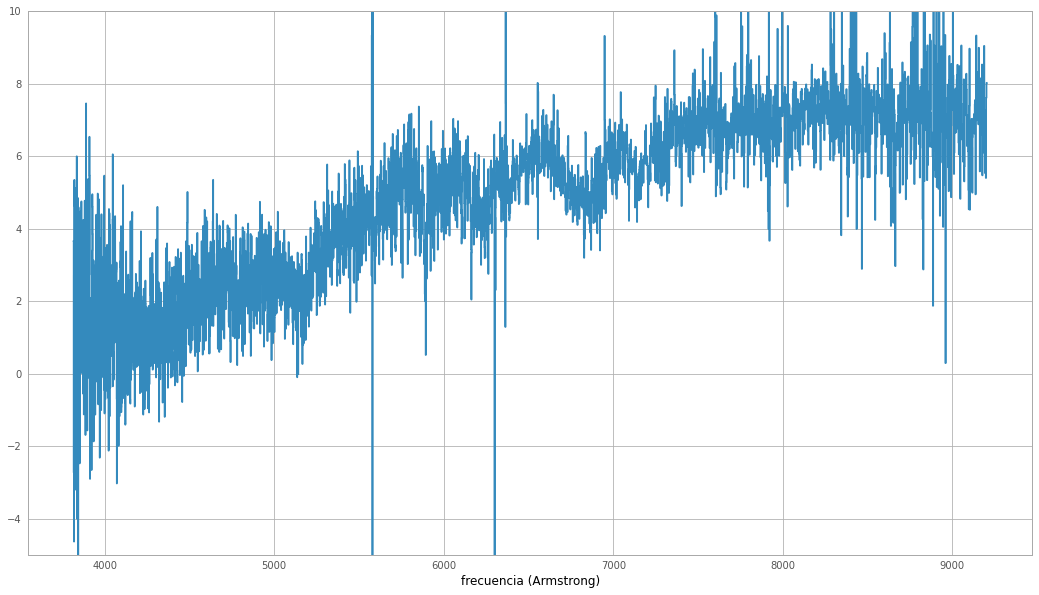

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(X,y,marker='', drawstyle='steps-mid')
plt.xlabel('frecuencia (Armstrong)')
plt.ylim(-5,10)

## Ficheros csv con los datos de los espectros.

Como se ha comentado junto con los enlaces a los espectros también hemos descargo un csv con información de los mismos. 

Estos fichero son:
* SDSS_1_optical_search_267552.csv
* SDSS_2_optical_search_267552.csv
* SDSS_3_optical_search_267552.csv
* SDSS_3_optical_search_267552.csv

Cargamos el primero para inspeccionar los datos que contiene.

In [ ]:
df_info_espectros = pd.read_csv("../Espectros/BD_espectros_sample/SDSS_1_optical_search_267552.csv",index_col=None, encoding='utf-8')
df_info_espectros

,#plate,mjd,fiberid,run2d,specobj_id,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass
0,275,51910,272,'26','309697273216919552','10:42:51.28','+00:04:22.23',0.64,0.000039,0.000046,0,'STAR','M8'
1,275,51910,337,'26','309715140280870912','10:43:20.47','+01:04:39.41',10.18,0.000567,0.000023,0,'STAR','M2V'
2,277,51908,496,'26','312010645648205824','11:02:47.93','+00:30:39.59',0.37,-0.000035,0.000028,0,'STAR','M8'
3,280,51612,316,'26','315338862379427840','11:15:54.18','+00:10:35.44',8.68,-0.000032,0.000030,0,'STAR','M2'
4,281,51614,133,'26','316414459662854144','11:27:53.83','-00:51:39.48',28.26,0.000387,0.000010,0,'STAR','M0V'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,1800,53884,624,'26','2026791421293389824','13:31:08.59','+10:24:57.75',2.44,0.000012,0.000054,0,'STAR','M4'
868,1829,53494,427,'26','2059388361101043712','14:44:04.54','+06:30:26.72',2.07,-0.000345,0.000102,0,'STAR','M2V'
869,1893,53239,490,'26','2131463268168919040','22:40:44.88','+13:57:26.55',14.51,-0.000265,0.000017,0,'STAR','M0'
870,1899,53262,581,'26','2138243681885382656','01:50:36.99','+14:33:39.23',6.77,-0.000033,0.000026,0,'STAR','M0'


In [ ]:
df_info_espectros.columns

Index(['#plate', 'mjd', 'fiberid', 'run2d', 'specobj_id', 'ra', 'dec',
       'sn_median_r', 'z', 'zerr', 'zwarning', 'class', 'subclass'],
      dtype='object')

En principio la información que nos puede interesar es:
'plate', 'mjd', 'fiberid', 'specobj_id', 'ra', 'dec',
  'z',  'class', 'subclass'

# Creación de los dataset.

Para la creación del data set uniremos los ficheros con la información de las enanas marrones obtenidas del trabajo de xxxxxxx con los espectros y datos descargados de SDSS.

Cargamos los nombres de los ficheros que contienen los espectros y los csv con la información de los objetos del directroriu

In [ ]:
ficheros= os.walk('../Espectros/BD_espectros_sample/')

In [ ]:
nombre_directorio, dirs, ficheros = next(ficheros)

In [ ]:
nombre_directorio

'../Espectros/BD_espectros_sample/'

Separamos los .fit y los .csv creando una lista para cada uno.

In [ ]:
fich_fit = [x for x in ficheros if os.path.splitext(x)[1]=='.fits']

Nos aseguramos de que empiecen por 'spec'

In [ ]:
espc_fit =  [x for x in fich_fit if x[:4]=='spec']
len(espc_fit)

3496

In [ ]:
fich_csv = [x for x in ficheros if os.path.splitext(x)[1]=='.csv']
fich_csv

['SDSS_1_optical_search_267552.csv',
 'SDSS_2_optical_search_267552.csv',
 'SDSS_3_optical_search_267552.csv',
 'SDSS_4_optical_search_267552.csv']

## Creación dataset con los espectros.

Teníamos 4 HDU:

* 0 PrimaryHDU  
* 1 COADD  
* 2  SPECOBJ        
* 3  SPZLINE  

Del primer HDU no usaremos ningún dato.

De COADD nos interesa ['flux',	'loglam'], el flujo y el logarimo de la frecuencia. 

De SPECOBJ cargaremos 'PLATEQUALITY', 'SPECOBJID', la calidad de la placa y el identificador del espectro. PLATE, MJD, FIBER, CLASS, SUBCLASS y Z. ['PLATE','MJD','FIBERID'] lo usaremos como clave foranea para recuperar la información de las enanas marrones del fichero del Savheva et al. 2014.


In [ ]:
def carga_espectro(hdul_):
  '''
  INPUT : l HDU COADD con el espectro.
  ----------------
  OUTPUT : dos vectores. El primero con los flujos. El segundo con  frecuencia en Amrsmtrons redondeada a un decimal
  '''
  datos=hdul_.data
  df_espectro =pd.DataFrame(columns=datos.dtype.names)
  for i in datos:
    data_temp = np.asarray(list(i))
    df_temp = pd.DataFrame(data=data_temp.reshape(1,-1), columns=datos.dtype.names)
    df_espectro =pd.concat([df_espectro, df_temp], ignore_index=True)

  return np.asarray(df_espectro['flux']), np.around(10**np.asarray(df_espectro['loglam']),1)



In [ ]:
def datos_objeto(hdul_, atr_num, atr_float, atr_obj):

  '''
  INPUT : la HDU SPECOBJ 
          Dos listas:
               atr_num con la lista de los atributos numéricos a recuperar
               atr_obj con la lista de los atributos tipo cadena de caracteres

  ----------------
  OUTPUT : una lista con los siguientes datos PLATE, MJD, FIBER, PLATEQUALITY, 'SPECOBJID', CLASS, SUBCLASS y Z. 
  '''
  list_datos=[]
  datos = hdul_.data
  for atr in atr_num:
    list_datos.append(int(datos[atr]))
  for atr in atr_float:
    list_datos.append(float(datos[atr]))
  for atr in atr_obj:
    list_datos.append(str(datos[atr][0]).strip())
  return list_datos





Definimos la estructura del dataset donde guardamos los espectros

In [ ]:
#creamos dos listas, una con los atributos numéricos a recuperar de SPECOBJ y otra con los tipo string
atributos_enteros =['PLATE', 'MJD', 'FIBERID', 'SPECOBJID']
atributos_float =['Z','E_RR']
atributos_obj = ['PLATEQUALITY',  'CLASS', 'SUBCLASS']
columnas = ['nom_fichero_fit','flujo','frec']+atributos_enteros+atributos_float+atributos_obj
df_obj_espectros = pd.DataFrame(columns= columnas)
df_obj_espectros

,nom_fichero_fit,flujo,frec,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS


In [ ]:
!pip install pyprind

En el código siguiente creamos el dataset con la información que nos interesa.

In [ ]:
import pyprind
pbar = pyprind.ProgBar(len(espc_fit))
for fichero_fit in espc_fit:
  with fits.open(nombre_directorio+fichero_fit) as hdul:
    flujo, frec = carga_espectro(hdul['COADD'])
    info_obj = datos_objeto(hdul['SPECOBJ'], atributos_enteros, atributos_float, atributos_obj)

  df_temp_espectros = pd.DataFrame(columns= columnas)
  df_temp_espectros.nom_fichero_fit = [fichero_fit]
  df_temp_espectros['flujo'] =[flujo]
  df_temp_espectros['frec'] = [frec] #en realidad es la longitud de onda
  df_temp_espectros[atributos_enteros+atributos_float+atributos_obj]=info_obj 
  df_obj_espectros = pd.concat([df_obj_espectros,df_temp_espectros], ignore_index=True)
  pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 03:54:23


In [ ]:
df_obj_espectros.rename(columns = {'frec':'long_A'},inplace=True)

In [ ]:
df_obj_espectros

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS
0,spec-1941-53386-0433.fits,"[0.35031041500000004, -0.1485088319, 0.0116492...","[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2
1,spec-1808-54176-0058.fits,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V
2,spec-1970-53386-0009.fits,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6
3,spec-1803-54152-0200.fits,"[-0.5595631599, 1.6141862868999999, -0.4718873...","[3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....",1803,54152,200,2030052577277667328,0.000217,good,STAR,M2V
4,spec-1955-53442-0499.fits,"[-0.4254819751, 0.28042450550000003, 1.2131350...","[3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....",1955,53442,499,2201271539700099072,-0.000042,marginal,STAR,M2V
...,...,...,...,...,...,...,...,...,...,...,...
3491,spec-0885-52379-0137.fits,"[0.6488318443000001, 1.1210706234, 0.755453825...","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",885,52379,137,996459115741997056,-0.000392,good,STAR,M3
3492,spec-0712-52199-0221.fits,"[3.8596711159, 2.1484868526, -2.7742624283, 0....","[3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....",712,52199,221,801701518582507520,0.000100,good,STAR,M2
3493,spec-0730-52466-0251.fits,"[1.093152523, 1.5214309691999999, 2.8724341393...","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",730,52466,251,821975967722399744,-0.000098,good,STAR,M2
3494,spec-0707-52177-0095.fits,"[-0.6275257468000001, -0.2927546501, -1.621553...","[3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....",707,52177,95,796037384062920704,-0.000013,good,STAR,M8


### Guardado/carga de los espectros

Lo guardamos el dataset en formato json. (No es posible en csv)

In [ ]:
df_obj_espectros.to_json(nombre_directorio+'datos_obj_espectros.json')

Comprobamos que se lee correctamente.

In [ ]:
df_obj_espectros_fichero = pd.read_json(nombre_directorio+'datos_obj_espectros.json')


In [ ]:
df_obj_espectros_fichero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3496 entries, 0 to 3495
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_fichero_fit  3496 non-null   object 
 1   flujo            3496 non-null   object 
 2   long_A           3496 non-null   object 
 3   PLATE            3496 non-null   int64  
 4   MJD              3496 non-null   int64  
 5   FIBERID          3496 non-null   int64  
 6   SPECOBJID        3496 non-null   int64  
 7   Z                3496 non-null   float64
 8   PLATEQUALITY     3496 non-null   object 
 9   CLASS            3496 non-null   object 
 10  SUBCLASS         3496 non-null   object 
 11  Z_ERR            3496 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 355.1+ KB


Inspeccionamos las frecuencias. Observamos que son distintas. Eso es un problema ya que interesaría que fueran todas iguales. 

In [ ]:

df_obj_espectros['long_A'].head(10)

0    [3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....
1    [3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....
2    [3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....
3    [3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....
4    [3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....
5    [3787.9, 3788.8, 3789.7, 3790.5, 3791.4, 3792....
6    [3787.0, 3787.9, 3788.8, 3789.7, 3790.5, 3791....
7    [3815.9, 3816.8, 3817.7, 3818.6, 3819.4, 3820....
8    [3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....
9    [3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....
Name: long_A, dtype: object

## Creación dataset con los datos de las EM obtenida de SDSS.

In [ ]:
directorio = '../Espectros/BD_espectros_sample/'
pref = 'SDSS_'
sufi = '_optical_search_267552.csv'

In [ ]:
df_info_espectros = pd.read_csv(directorio+pref+str(1)+sufi,index_col=None, encoding='utf-8')
for i in range(2,5):
  df_temp_espectros = pd.read_csv(directorio+pref+str(i)+sufi,index_col=None, encoding='utf-8')
  df_info_espectros = pd.concat([df_info_espectros, df_temp_espectros], ignore_index= True)

df_info_espectros

,#plate,mjd,fiberid,run2d,specobj_id,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass
0,275,51910,272,'26','309697273216919552','10:42:51.28','+00:04:22.23',0.64,0.000039,0.000046,0,'STAR','M8'
1,275,51910,337,'26','309715140280870912','10:43:20.47','+01:04:39.41',10.18,0.000567,0.000023,0,'STAR','M2V'
2,277,51908,496,'26','312010645648205824','11:02:47.93','+00:30:39.59',0.37,-0.000035,0.000028,0,'STAR','M8'
3,280,51612,316,'26','315338862379427840','11:15:54.18','+00:10:35.44',8.68,-0.000032,0.000030,0,'STAR','M2'
4,281,51614,133,'26','316414459662854144','11:27:53.83','-00:51:39.48',28.26,0.000387,0.000010,0,'STAR','M0V'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,2955,54562,85,'26','3327057665879730176','15:41:38.61','+00:54:17.24',2.15,0.000099,0.000071,0,'STAR','M3'
3492,2955,54562,388,'26','3327140953885534208','15:37:03.16','+01:43:46.66',0.22,0.000085,0.000063,0,'STAR','M8'
3493,2956,54525,58,'26','3328176143462328320','09:56:35.70','+45:36:47.08',1.04,-0.000097,0.000114,0,'STAR','M5'
3494,2959,54537,203,'26','3331593700680689664','07:52:53.40','+30:32:31.78',7.05,0.000276,0.000033,0,'STAR','M0'


In [ ]:
df_info_espectros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #plate       3496 non-null   int64  
 1   mjd          3496 non-null   int64  
 2   fiberid      3496 non-null   int64  
 3   run2d        3496 non-null   object 
 4   specobj_id   3496 non-null   object 
 5   ra           3496 non-null   object 
 6   dec          3496 non-null   object 
 7   sn_median_r  3496 non-null   float64
 8   z            3496 non-null   float64
 9   zerr         3496 non-null   float64
 10  zwarning     3496 non-null   int64  
 11  class        3496 non-null   object 
 12  subclass     3496 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 355.2+ KB


### Guardado información en csv de las información relativa a los objetos y espectros.

Salvamos en formato .csv

In [ ]:
df_info_espectros.to_csv(directorio+'datos_SDSS_objetos.csv', index=False, encoding='utf-8')


In [ ]:
df_info_espectros = pd.read_csv(directorio+'datos_SDSS_objetos.csv',index_col=False, encoding='utf-8')

In [ ]:
df_info_espectros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #plate       3496 non-null   int64  
 1   mjd          3496 non-null   int64  
 2   fiberid      3496 non-null   int64  
 3   run2d        3496 non-null   object 
 4   SPECOBJID    3496 non-null   int64  
 5   ra           3496 non-null   object 
 6   dec          3496 non-null   object 
 7   sn_median_r  3496 non-null   float64
 8   z            3496 non-null   float64
 9   zerr         3496 non-null   float64
 10  zwarning     3496 non-null   int64  
 11  class        3496 non-null   object 
 12  subclass     3496 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 355.2+ KB


##Carga de las plantillas Subenanas marrones.

### Revisión datos contenenidos en los ficheros fits.

In [ ]:
fichero = '/content/drive/MyDrive/Astrofisica/Espectros/sdb/sdm0_template.fits'


In [ ]:
 hdul = fits.open(fichero)

In [ ]:
hdul.info()


Filename: /content/drive/MyDrive/Astrofisica/Espectros/sdb/sdm0_template.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     21   60000R x 2C   [E, E]   


In [ ]:
metadatos = hdul[1].header

In [ ]:
data=hdul[1].data #espectro proveniente de SDSS

In [ ]:
hdul.close()

In [ ]:
metadatos

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11b          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                    8 /Number of bytes per row                         
NAXIS2  =                60000 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    2 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [ ]:
data

FITS_rec([(5000.    , 0.38113087), (5000.058 , 0.37819976),
          (5000.1167, 0.37521926), ..., (8499.767 , 1.1205745 ),
          (8499.825 , 1.1190845 ), (8499.883 , 1.1177942 )],
         dtype=(numpy.record, [('WAVE', '>f4'), ('FLUX', '>f4')]))

In [ ]:
print(f"Número de datos por espectro {data.shape[0]}")

Número de datos por espectro 60000


In [ ]:
data.shape

(60000,)

Los datos longitud de onda-flujo vienen en tuplas.

In [ ]:
x=np.empty(0)
y=np.empty(0)
for k, i in enumerate(data):
  x=np.hstack((x,i[0]))
  y=np.hstack((y,i[1]))
  sys.stderr.write('\r %0*d / %d' % (5,k+1, data.shape[0]))
  sys.stderr.flush()


 060000 / 60000

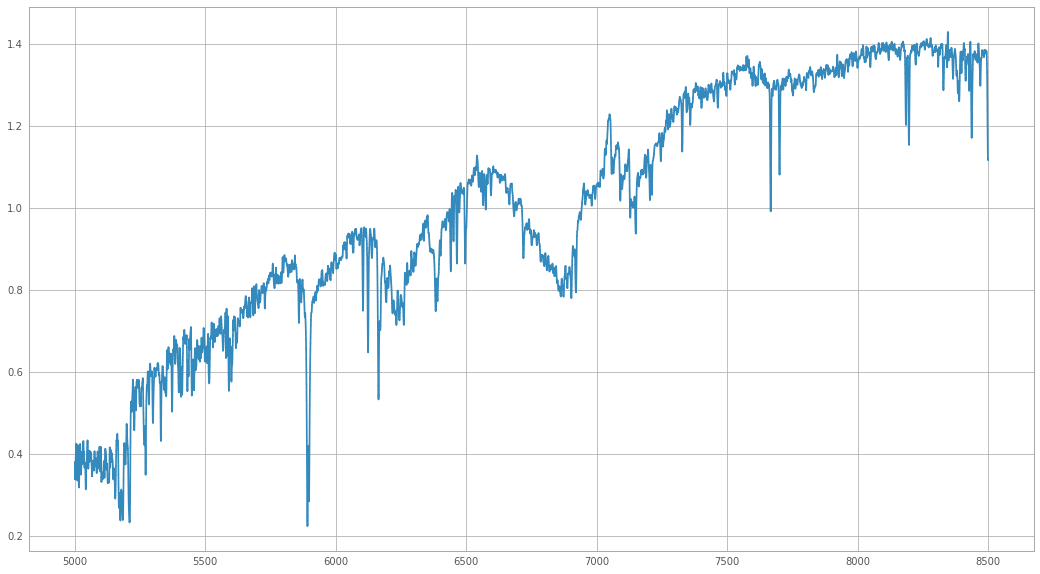

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(x,y,marker='', drawstyle='steps-mid')


### Carga de los espectros

#### Definición de funciones

In [ ]:
def carga_espec_plantilla(hdul_esp):
  """
  : Param: Cargamos el HDU 1 con el espectro
  : Output: dos vectores, uno con las longitudes de onda y otro con los flujos

  """
  x=np.empty(0)
  y=np.empty(0)
  for k, i in enumerate(hdul_esp):
    x=np.hstack((x,i[0]))
    y=np.hstack((y,i[1]))

  return x, y


#### Carga plantilas desde fits

In [ ]:
tipos = ['usdm','esdm','sdm']

In [ ]:
import pyprind
pbar = pyprind.ProgBar(30)

df_espectro_plantilla = pd.DataFrame(columns=['flujo','long_A','clase_metalicidad'])
path=os.getcwd()
tipos = ['usdm','esdm','sdm']
for clase in tipos:
  for i in range(0,10):
    df_temp = pd.DataFrame(columns=['flujo','long_A','clase_metalicidad'])
    fichero = os.path.join(path, 'Plantillas/%s%s_template.fits' %(clase,i))
    with fits.open(fichero) as hdul:
      long_onda, flujo = carga_espec_plantilla(hdul[1].data)
    df_temp['long_A']=[long_onda]
    df_temp['flujo']=[flujo]
    df_temp['clase_metalicidad']=clase+str(i)
    df_espectro_plantilla = pd.concat([df_espectro_plantilla,df_temp], ignore_index=True)
    pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:05:23


In [ ]:
df_espectro_plantilla.head(3)

,flujo,long_A,clase_metalicidad
0,"[0.39984408020973206, 0.3969808518886566, 0.39...","[5000.0, 5000.05810546875, 5000.11669921875, 5...",usdm0
1,"[0.36118409037590027, 0.35979902744293213, 0.3...","[5000.0, 5000.05810546875, 5000.11669921875, 5...",usdm1
2,"[0.34682202339172363, 0.3459565341472626, 0.34...","[5000.0, 5000.05810546875, 5000.11669921875, 5...",usdm2


In [ ]:
df_espectro_plantilla.shape

(30, 4)

#### Guardado/carga de los espectros

Lo guardamos el dataset en formato json. (No es posible en csv)

In [ ]:
df_espectro_plantilla.to_json('Plantillas/espectros_plantillas.json')

Comprobamos que se lee correctamente.

In [ ]:
df_esp_pla = pd.read_json('Plantillas/espectros_plantillas.json')


In [ ]:
df_esp_pla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flujo              30 non-null     object 
 1   Long_A             30 non-null     object 
 2   clase_metalicidad  30 non-null     object 
 3   long_A             0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


Inspeccionamos las longitudes de onda. Observamos que son las mismas

In [ ]:

df_esp_pla

,flujo,Long_A,clase_metalicidad,long_A
0,"[0.3998440802, 0.3969808519, 0.3941309154, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm0,NaN
1,"[0.3611840904, 0.3597990274, 0.3584717214, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm1,NaN
2,"[0.3468220234, 0.3459565341, 0.3451767564, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm2,NaN
3,"[0.3326164484, 0.3334602714, 0.3342262506, 0.3...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm3,NaN
4,"[0.2566303313, 0.2506335974, 0.244899198400000...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm4,NaN
5,"[0.27648752930000003, 0.278170079, 0.280117690...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm5,NaN
6,"[0.2835782766, 0.2850551009, 0.28632617, 0.287...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm6,NaN
7,"[0.1269703656, 0.1223803312, 0.118335038400000...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm7,NaN
8,"[0.0651824921, 0.0654907376, 0.0657525063, 0.0...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm8,NaN
9,"[-0.0433673523, -0.0347368494, -0.0256114528, ...","[5000.0, 5000.0581054688, 5000.1166992188, 500...",usdm9,NaN


#Final